# Q1

Consider the following causal graph:

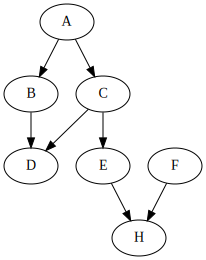

In [9]:
from graphviz import Digraph
g = Digraph()
g.edge('A', 'B')
g.edge('A', 'C')
g.edge('B', 'D')
g.edge('C', 'D')
g.edge('C', 'E')
g.edge('E', 'H')
g.edge('F', 'H')

g

Evaluate each of the following statements as true or false. Explain why
your answer is correct.

## Q1.1

1.  $H \perp A$
2.  $H \perp A \mid E$
3.  $H \perp A \mid F$
4.  $E \perp F$
5.  $D \perp A \mid C$
6.  $D \perp H$
7.  $F \perp E \mid C$
8.  $F \perp E \mid H$
9.  $D \perp H \mid C$

1. $H \perp A$ is false because the flow of dependency from A to H is not blocked by any node.
2. $H \perp A \mid E$ is true because the flow of dependency from A to H is blocked by E.
3. $H \perp A \mid F$ is false because the flow of dependency from A to H is not blocked by any node.
4. $E \perp F$ is false because the flow of dependency from E to F is not blocked by H as H is a collider.
5. $D \perp A \mid C$ is false because you can stil get to D from A through B.
6. $D \perp H$ is false because you can get from D to H through A.
7. $F \perp E \mid C$ is true because the flow of dependency from E to F is blocked by H.
8. $F \perp E \mid H$ is false because conditioning on H opens the path from E to F.
9. $D \perp H \mid C$ is true because the flow of dependency from D to H through A is now blocked by C.

## Q1.2

Suppose we are interested in finding the treatment effect of A on D. We
have data on all of the variables in the graph, and we want to use the
backdoor criterion to identify the causal effect. Which variables should
we condition on? Explain your answer.

We should condition on C as that will close off any pathways through C affecting A. This effectively blocks the path of dependency of all variables on A. It will also block the paths of dependency of all variables on D. This is because C is a fork and conditioning on it will close the paths of dependency flowing backwards.

## Q1.3

Suppose we are interested in finding the treatment effect of A on H.
Which variables should we condition on? Explain your answer.

We should condition on F. The path of dependency through D is closed without the need for conditioning. The two factors affecting H are A (through C and E) and F. Conditioning on F will control for any confounding effects of F on H.

## Q1.4

Suppose we are interested in finding the treatment effect of B on D. We
have data on A. Should we condition on A or C, or both? Explain your
answer.

We just have to condition on C. This will both close the path of dependency of A on D and also control for any confounding effects of C on D. We should also condition on A if we want to control for any confounding effects of A on D. Because even though A only affects D through C, it is still a confounder if we want to find the treatment effect of B on D.

# Q2

The most famous example of selection bias is shown in this figure

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Survivorship-bias.svg/1920px-Survivorship-bias.svg.png)

From [Wikipedia](https://en.wikipedia.org/wiki/Survivorship_bias):
“During World War II, the statistician Abraham Wald took survivorship
bias into his calculations when considering how to minimize bomber
losses to enemy fire. The Statistical Research Group (SRG) at Columbia
University, which Wald was a part of, examined the damage done to
aircraft that had returned from missions and recommended adding armor to
the areas that showed the least damage. The bullet holes in the
returning aircraft represented areas where a bomber could take damage
and still fly well enough to return safely to base. Therefore, Wald
proposed that the Navy reinforce areas where the returning aircraft were
unscathed, inferring that planes hit in those areas were the ones most
likely to be lost.”

Prior to Wald’s revelation, the military had instead been reinforcing
the areas that showed the most damage.

## Q2.1

Draw a DAG that represents the causal relationships between the
variables in this example. What are the variables? What are the arrows?
What are the causal relationships? In the markdown cell, explain why it
would be wrong to armor the areas that showed the most damage.

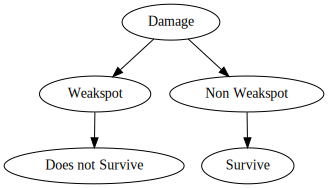

In [16]:
# your code here
g = Digraph()
g.edge('Damage', 'Weakspot')
g.edge('Damage', 'Non Weakspot')
g.edge('Non Weakspot', 'Survive')
g.edge('Weakspot', 'Does not Survive')

g

In this example, when the plane is damaged, it can be damaged in two possible areas: a weakspot and a non weakspot. When the damage his a weakspot, the plane does not survive. When the damage hits a non weakspot, the plane survives. All the planes that survive are the ones that have been hit in a non weakspot. Therefore, if we only look at the planes that survive, we will only see damage in non weakspots. This is because the planes that have been hit in weakspots have not survived. By armoring the visible damage, ie the non weakspot, we are conditioning our reasoning on the planes that have survived and hence are not dealing with the actual cause of planes not surviving.

## Q3

-   Suppose we had data on the following six variables:
    1.  $Yield$: the amount of corn produced by a farm
    2.  $Seeds$: the amount of seeds planted by the farm
    3.  $Rain$: the amount of rain that fell during the growing season
    4.  $Fertilizer$: the amount of fertilizer applied to the crop
    5.  $Equipment$: the investment value of equipment owned by the farm
    6.  $Subsidy$: the amount of government subsidy received by the farm
        to grow corn
    7.  $Demand$: the demand for corn

At the beginning of the season, the farmer measures demand, gets a
subsidy, and then uses this informtion to choose how much to invest in
seeds,equipment, and fertilizer, which will be applied at the beginning
of the season and eventually will partially determine the yield at the
end of the season. During the season, rain falls exogenously on the corn
and becomes the final factor in how much corn is produced.

Assume that this is the true data generating process, and that we have
data on all of the variables.

## Q3.1

Use the graphviz library to draw a DAG that represents the causal
relationships between the variables in this example.

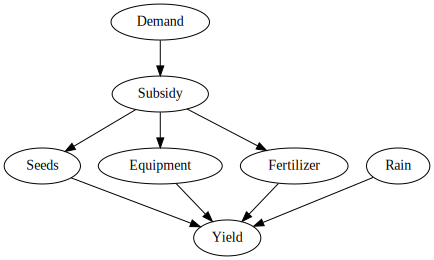

In [21]:
# your code here
g = Digraph()
g.edge('Demand', 'Subsidy')
g.edge('Subsidy', 'Seeds')
g.edge('Subsidy', 'Equipment')
g.edge('Subsidy', 'Fertilizer')
g.edge('Rain', 'Yield')
g.edge('Seeds', 'Yield')
g.edge('Equipment', 'Yield')
g.edge('Fertilizer', 'Yield')
g

## Q3.2

Are there any variables that we can remove in order to simplify this
model? If so, explain which ones and why.

We can combine Seeds, Equipment and Fertilizer into one factor named Inputs for example. This is because Subsidies affect yield through these mediating factors. As these factors are purely mediators for subsidies and are not affected by any other factors, we can combine them into one factor.

## Q3.3

Suppose we are interested in finding the effect of government subsidies
on crop yields. Which variables should we condition on? Explain your
answer.

We should condition on Rain and Demand. This is because aside from Subsidy, Rain and Demand are the only other variables that affect Yield. While demand only affects Yield through Subsidy, it is still a confounder if we want to find the effect of Subsidy on Yield. Rain is an exogenous variable that affects Yield and hence should be conditioned on.